# Welcome!

The purpose of this file is to give users a quick dirty and overview of how to run the eco sim. After reading through this simulator, you should be able to quickly harness most facets of the simulator with ease. To begin, let's import the `b2sim` module...

In [3]:
import sys
sys.path.append('../')
import b2sim as b2

To begin, let's consider the following toy example: Suppose it is Round 14 in a reasonably anti-stalled game, and I have access to 2 banana plantations with valuable bananas and am currently eco'ing with grouped blacks. I want to simulate the game from this round until the end of Round 16 and see how much money I have by then. To begin, we need to initialize the round lengths

In [4]:
rounds = b2.Rounds(0.25)

Here, the number specifies the "stall factor" for each round. $0$ represents a fully anti-stalled game while $1$ represents a fully-stalled game. If necessary, we can specify different rounds to have different stall factors, or even manually set the rounds times, but for now we will just stick to this simple construction. Next, let's specify the farms that we have..

In [5]:
farms = {
    0: b2.initFarm(rounds.getTimeFromRound(7), upgrades = [3,2,0]),
    0: b2.initFarm(rounds.getTimeFromRound(13.9), upgrades = [3,2,0])
}

In the `b2.InitFarm` call, the first argument denotes when the farm was purchased/last upgrades, which is important since farm upgrades have different rules for paying out when bought mid-round versus before a round. In our example case, the exact time is not important, only that we clearly tell the simulator that these farms were purchased before Round 14. As a side note, `13.9` in the above means 9/10ths of the way through round 13.

In general, if you intend to make purchases or change how you eco throughout the simulated game time, you'll also have to specify an "eco queue" and a "buy queue" before running the simulator, but for our toy example case this is not necessary. Let's proceed to defining the initial game state:

In [7]:
initial_state_game = {
    'Cash': 0,
    'Eco': 800,
    'Eco Send': 'Grouped Blacks',
    'Rounds': rounds,
    'Game Round': 14,
    'Farms': farms
}

The `Rounds` paramater in the dictionary object up above corresponds with the `Rounds` object that we are using to track round lengths. Now that everything is defined, we can intialize an instance of the game with our parameters and simulate until the desired ending time.

The current cash and eco are (744.0,1382.0)


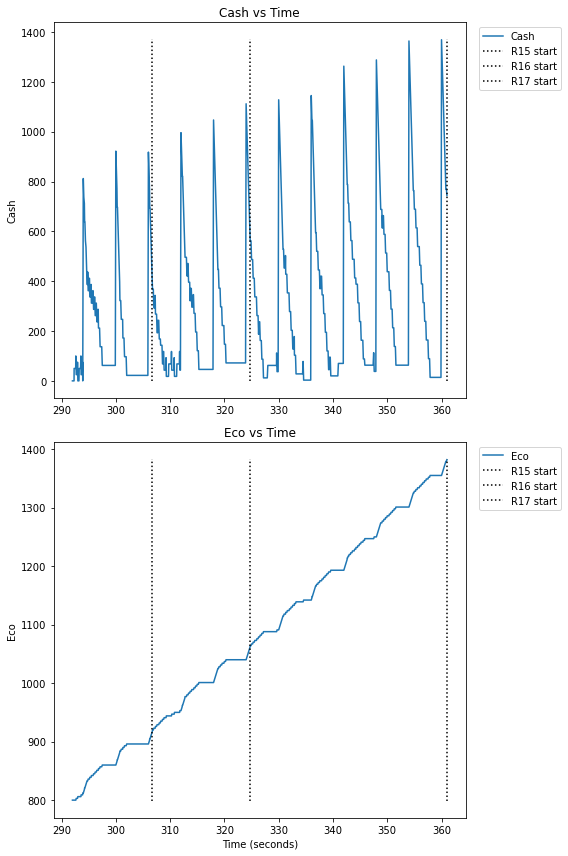

In [11]:
game_state = b2.GameState(initial_state_game)
game_state.fastForward(target_round = 17)
game_state.viewCashEcoHistory((8,12))
print("The current cash and eco are (%s,%s)"%(game_state.cash, game_state.eco))

And there we have it! We've just simulated our first game state!